In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np

In [24]:
df_adjusted = pd.read_pickle('../Dataframes/daily_temp_gbg_save_adjusted.pkl')

In [25]:
df_original = pd.read_pickle('../Dataframes/df_daily_temp.pkl')

Get first summer days

In [26]:
df_original['Month'] = df_original['Datum'].dt.month
df_original['Year'] = df_original['Datum'].dt.year
df_original['Day_of_year'] = df_original['Datum'].dt.day_of_year

In [30]:
df_original['Over_10_5_days_in_a_row'] = 0

In [ ]:
for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] >= 10:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

In [ ]:
df_original[140:160]

In [28]:
df_adjusted

,Datum,Kvalitet,Snittemperatur,Month,Year,Day_of_year,Over_10_5_days_in_a_row
0,1944-01-01,G,3.20,1,1944,1,0
1,1944-01-02,G,3.60,1,1944,2,0
2,1944-01-03,G,2.80,1,1944,3,0
3,1944-01-04,G,-4.47,1,1944,4,0
4,1944-01-05,G,-1.40,1,1944,5,0
...,...,...,...,...,...,...,...
29109,2023-10-12,G,12.78,10,2023,285,0
29110,2023-10-13,G,12.59,10,2023,286,0
29111,2023-10-14,G,12.24,10,2023,287,1
29112,2023-10-15,G,10.79,10,2023,288,0


In [40]:
def first_summer_day_original(year):
    for ind, val in df_original[df_original['Year'] == year].iterrows():
        if df_original['Over_10_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_original['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None

In [39]:
def first_summer_day_adjusted(year):
    for ind, val in df_adjusted[df_adjusted['Year'] == year].iterrows():
        if df_adjusted['Over_10_5_days_in_a_row'][ind] == 1:
            first_summer_day = df_adjusted['Datum'][ind-4]
            return first_summer_day
            break
        else:
            pass
    return None

In [46]:
summer_days_original = []
for i in range(1944, 2023):
    summer = pd.to_datetime(first_summer_day_original(i))
    summer_days_original.append(summer)


summer_days_adjusted= []
for i in range(1944, 2023):
    summer = pd.to_datetime(first_summer_day_adjusted(i))
    summer_days_adjusted.append(summer)

In [47]:
len(summer_days_adjusted)

79

In [48]:
len(summer_days_original)

79

In [49]:
years_original = []

for x, i in enumerate(summer_days_original):
    string = str(i.year)
    years_original.append(string)

months_original = []

for x, i in enumerate(summer_days_original):
    string = str(i.month)
    months_original.append(string)

days_original = []
for x, i in enumerate(summer_days_original):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_original.append(string)

In [50]:
years_adjusted = []

for x, i in enumerate(summer_days_adjusted):
    string = str(i.year)
    years_adjusted.append(string)

months_adjusted = []

for x, i in enumerate(summer_days_adjusted):
    string = str(i.month)
    months_adjusted.append(string)

days_adjusted = []
for x, i in enumerate(summer_days_adjusted):
    string = str(i.day)
    if len(string) < 2:
        string = f'0{string}'
    days_adjusted.append(string)

In [68]:
day_of_year_original = []
for i in summer_days_original:
    day_of_year_original.append(i.day_of_year)

In [69]:
day_of_year_adjusted = []
for i in summer_days_adjusted:
    day_of_year_adjusted.append(i.day_of_year)

In [93]:
df_summer_days_original = pd.DataFrame({'Year': years_original, 'Month': months_original, 
                                        'Day': days_original, 'day_of_year': day_of_year_original})

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [71]:
df_summer_days_adjusted = pd.DataFrame({'Year': years_adjusted, 'Month': months_adjusted, 
                                        'Day': days_adjusted, 'day_of_year': day_of_year_adjusted})

In [102]:
df_summer_days_original['Year'] = pd.to_numeric(df_summer_days_original['Year'])
df_summer_days_original['Month'] = pd.to_numeric(df_summer_days_original['Month'])
df_summer_days_original['Day'] = pd.to_numeric(df_summer_days_original['Day'])

In [104]:
df_summer_days_adjusted['Year'] = pd.to_numeric(df_summer_days_adjusted['Year'])
df_summer_days_adjusted['Month'] = pd.to_numeric(df_summer_days_adjusted['Month'])
df_summer_days_adjusted['Day'] = pd.to_numeric(df_summer_days_adjusted['Day'])

In [103]:
df_summer_days_original.dtypes

Year           int64
Month          int64
Day            int64
day_of_year    int64
dtype: object

Prepare for the plot

In [83]:
ticlist = [100, 110, 120, 130, 140, 150, 160]

In [81]:
first_day = datetime(1944, 1, 1)
iss = first_day+timedelta(days=99)
iss

datetime.datetime(1944, 4, 9, 0, 0)

In [84]:
datelist = []
for i in ticlist:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist.append(f'{month}-{day}')

In [86]:
datelist

['04-09', '04-19', '04-29', '05-09', '05-19', '05-29', '06-08']

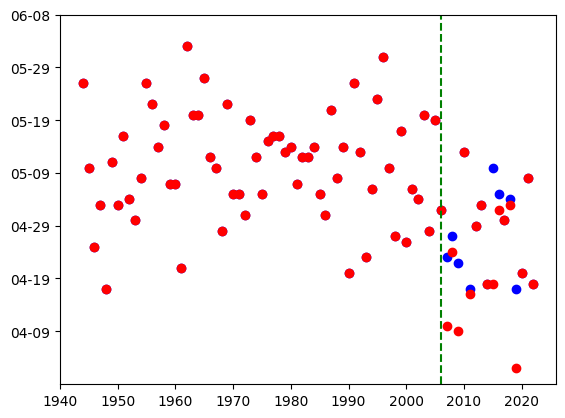

In [111]:
plt.figure

plt.scatter(x=df_summer_days_original['Year'], y=df_summer_days_original['day_of_year'], c='b')
plt.scatter(x=df_summer_days_adjusted['Year'], y=df_summer_days_adjusted['day_of_year'], c='r')
plt.axvline(x=2006, c='g', linestyle='--')
plt.yticks(ticks=ticlist, labels=datelist)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

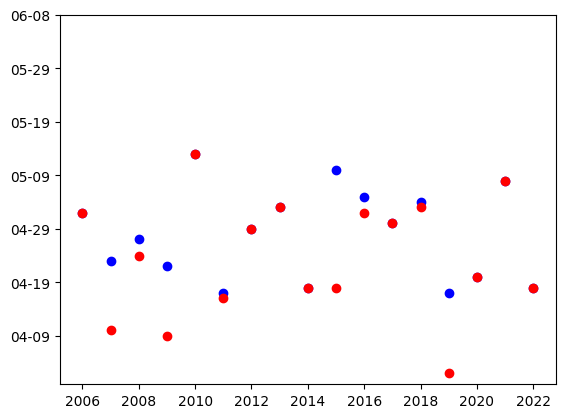

In [122]:
plt.figure

plt.scatter(x=df_summer_days_original[df_summer_days_original['Year'] > 2005]['Year'], 
            y=df_summer_days_original[df_summer_days_original['Year'] > 2005]['day_of_year'], c='b')
plt.scatter(x=df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['Year'], 
            y=df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['day_of_year'], c='r')
# plt.axvline(x=2006, c='g', linestyle='--')
plt.yticks(ticks=ticlist, labels=datelist)
plt.show()

In [127]:
days_original = [i for i in df_summer_days_original[df_summer_days_original['Year'] > 2005]['day_of_year']]

In [129]:
days_adjusted = [i for i in df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['day_of_year']]

In [153]:
years_comp = [i for i in df_summer_days_adjusted[df_summer_days_adjusted['Year'] > 2005]['Year']]

In [136]:
x = np.array(day_of_year_original)
y = np.array(day_of_year_adjusted)
np.mean(np.abs(x - y))

0.8987341772151899

In [158]:
len(years_comp)

17

In [159]:
df_comp_org_and_adj_days = pd.DataFrame({'Year': years_comp, 'Original': days_original, 'Adjusted': days_adjusted})

In [160]:
df_comp_org_and_adj_days['Diff'] = df_comp_org_and_adj_days['Original'] - df_comp_org_and_adj_days['Adjusted']

In [161]:
df_comp_org_and_adj_days['Diff'].mean()

4.176470588235294

In [167]:
df_comp_org_and_adj_days['Diff'].median()

0.0

In [166]:
df_comp_org_and_adj_days.sort_values(by='Year')

,Year,Original,Adjusted,Diff
0,2006,123,123,0
1,2007,114,101,13
2,2008,118,115,3
3,2009,113,100,13
4,2010,134,134,0
5,2011,108,107,1
6,2012,120,120,0
7,2013,124,124,0
8,2014,109,109,0
9,2015,131,109,22
